#### To develop models which can recognize the Rock,Paper and Scissors signs from the given images.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

import random as rn
rn.seed(1254)
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(37)
tf.random.set_seed(89)


### Setting base Directory

In [2]:
base_directory=r"C:\Users\vidvath.krishna\Documents\AIML\task4\Rock-Paper-Scissors\Rock-Paper-Scissors"

### Defining the Train directory

In [3]:
train_directory=os.path.join(base_directory,'rps/rps')
os.listdir(train_directory)

['paper', 'rock', 'scissors']

### Defining the Validation directory

In [4]:
validation_directory=os.path.join(base_directory,'rps-test-set/rps-test-set')
os.listdir(validation_directory)

['paper', 'rock', 'scissors']

### Defining the Test directory

In [5]:
test_directory=os.path.join(base_directory,'rps-validation')

# Visualising the Train dataset

In [6]:
paper_directory=os.path.join(train_directory,'paper')
rock_directory=os.path.join(train_directory,'rock')
scissors_directory=os.path.join(train_directory,'scissors')

In [7]:
paper_images=os.listdir(paper_directory)
rock_images=os.listdir(rock_directory)
scissors_images=os.listdir(scissors_directory)

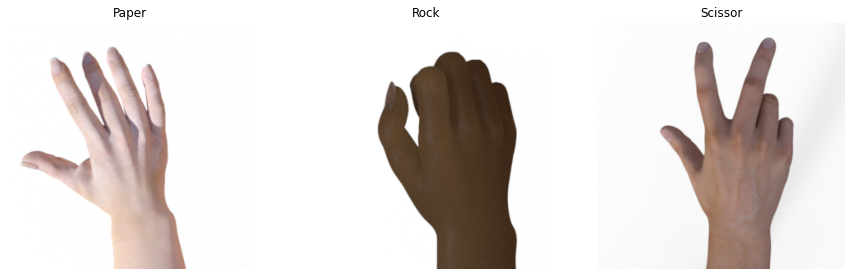

In [8]:
# Displaying random image from the dataset

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sample_paper = rn.choice(os.listdir(paper_directory))
image = load_img(paper_directory +'/'+sample_paper)
ax[0].imshow(image)
ax[0].set_title("Paper")
ax[0].axis("Off")

sample_rock = rn.choice(os.listdir(rock_directory))
image = load_img(rock_directory + '/' + sample_rock)
ax[1].imshow(image)
ax[1].set_title("Rock")
ax[1].axis("Off")

sample_scissor = rn.choice(os.listdir(scissors_directory))
image = load_img(scissors_directory +'/' + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Scissor")
ax[2].axis("Off")

plt.show()

# Data Preprocessing

In [9]:
# Defining the input image shape
inp_shape=(150,150,3)
target_size=(150,150)

## Data Augmentation

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.2,
    width_shift_range=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.2,
    width_shift_range=0.2
)

### Initializing Train and Validation generators 

In [11]:
#https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=target_size,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 2520 images belonging to 3 classes.


In [12]:
validation_generator=validation_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=target_size,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False   
)

Found 372 images belonging to 3 classes.


# Modelling 

## 1.Convolution Neural Network (CNN)

### Building CNN Architecture

In [13]:
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


tf.keras.backend.clear_session()  # For easy reset of notebook state.
model = None

model =Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=inp_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))


### Plotting and Summarizing Model architecture

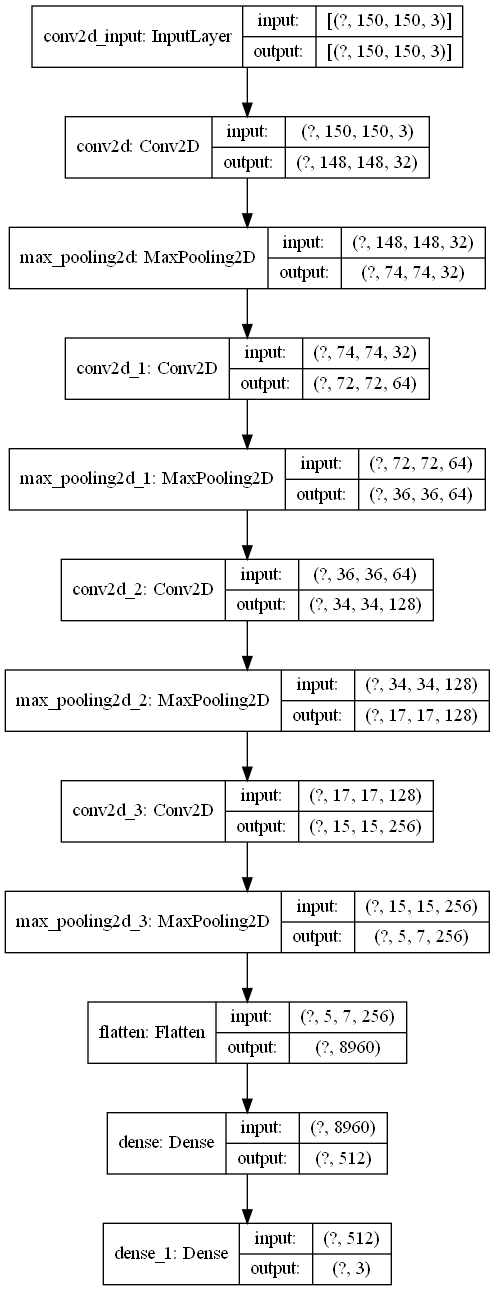

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

### Callbacks 

In [16]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard,ReduceLROnPlateau


##### EarlyStopping Callback

In [17]:
#https://keras.io/api/callbacks/early_stopping/
early_stopping=EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min',min_delta=0,restore_best_weights=True)

##### ModelCheckpoint Callback

In [18]:
#https://keras.io/api/callbacks/model_checkpoint/
filepath="model_cnn.hdf5"
model_checkpoint=ModelCheckpoint(filepath,save_best_only=True,verbose=1)


##### TensorBoard

In [19]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [20]:
# Clear any logs from previous runs.
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
#tensorboard
import datetime

os.makedirs('logs/fit', exist_ok=True)
log_directory = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard=TensorBoard(log_dir=log_directory,histogram_freq=1)

##### ReduceLROnPlateau Callback

In [22]:
#https://keras.io/api/callbacks/reduce_lr_on_plateau/
lr_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.001)

In [23]:
callbacks_list=[early_stopping,model_checkpoint,tensorboard,lr_rate_reduction]


### Compile

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# Defining training parameters
epoch=10

### Training the Model

In [26]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=epoch,verbose=1,callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
 1/79 [..............................] - ETA: 0s - loss: 1.1080 - accuracy: 0.3125WARNING:tensorflow:From C:\Users\vidvath.krishna\.conda\envs\tf\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
79/79 [==============================] - ETA: 0s - loss: 1.1176 - accuracy: 0.3317
Epoch 00001: val_loss improved from inf to 1.10074, saving model to model_cnn.hdf5
79/79 [==============================] - 80s 1s/step - loss: 1.1176 - accuracy: 0.3317 - val_loss: 1.1007 - val_accuracy: 0.3333
Epoch 2/10
79/79 [==============================] - ETA: 0s - loss: 1.0617 - accuracy: 0.4258
Epoch 00002: val_loss improved from 1.10074 to 0.89249, saving model to model_cnn.hdf5
79/79 [==============================] - 73s 921ms/step - 

### Model Evaluation

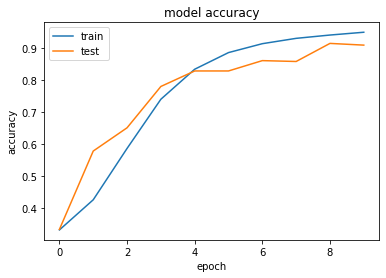

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

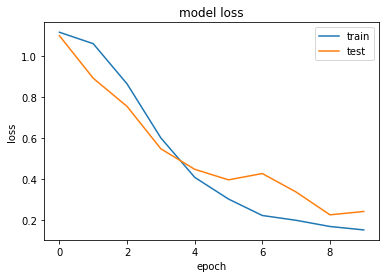

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [29]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

79/79 [==============================] - 39s 489ms/step - loss: 0.1732 - accuracy: 0.9421
Loss: 0.1732
Accuracy: 0.9421


In [30]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

12/12 [==============================] - 5s 432ms/step - loss: 0.2154 - accuracy: 0.9220
Loss: 0.2154
Accuracy: 0.9220


### Predicting the Signs on Test data

In [31]:
test_head=os.listdir(test_directory)[:5]
test_head

['paper-hires1.png',
 'paper-hires2.png',
 'paper1.png',
 'paper2.png',
 'paper3.png']

In [32]:
test_images=os.listdir(os.path.join(test_directory))
test_df=pd.DataFrame({'Image':test_images})
test_df.head()

,Image
0,paper-hires1.png
1,paper-hires2.png
2,paper1.png
3,paper2.png
4,paper3.png


In [33]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [34]:
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    test_directory, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 33 validated image filenames.


In [35]:
#Loading the saved model with best weights for prediction

model=tf.keras.models.load_model('model_cnn.hdf5')


In [36]:
predict=model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


In [37]:
# Identifying the classes

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [38]:
test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(label_map)

In [39]:
test_df

,Image,Label
0,paper-hires1.png,paper
1,paper-hires2.png,paper
2,paper1.png,paper
3,paper2.png,paper
4,paper3.png,paper
5,paper4.png,paper
6,paper5.png,scissors
7,paper6.png,paper
8,paper7.png,paper
9,paper8.png,paper


In [40]:
test_df.Label.value_counts()


scissors    12
rock        11
paper       10
Name: Label, dtype: int64

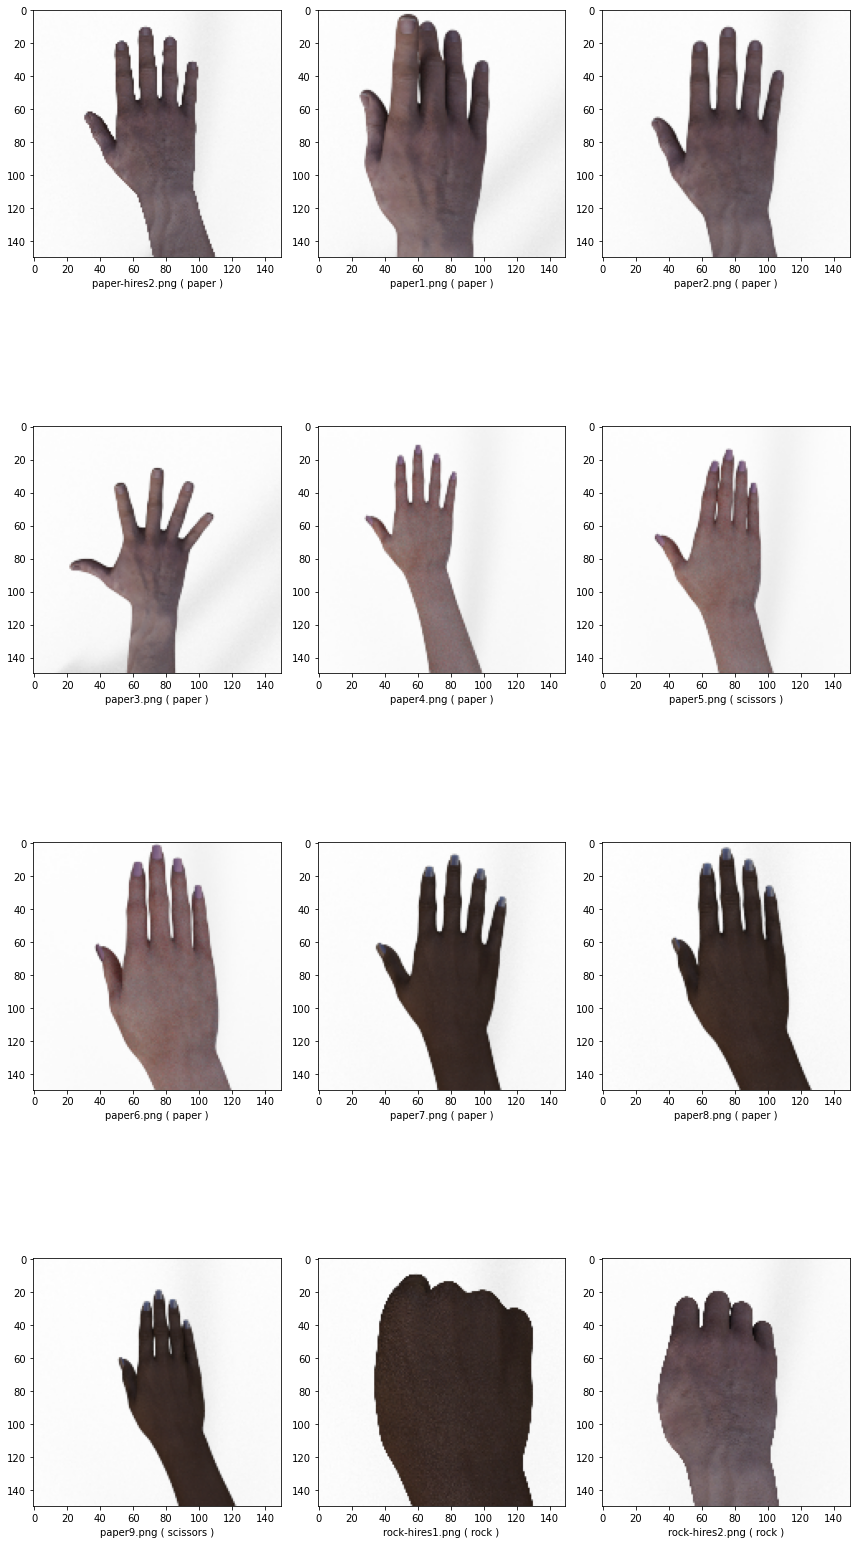

In [41]:
import random
from keras.preprocessing.image import load_img

v = random.randint(0, 6)

sample_test = test_df.iloc[v:(v+12)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(test_directory +'/'+ filename, target_size = (150, 150))
    plt.subplot(4, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

In [42]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)

In [43]:
cnn_test_acc=((sum(lis)/len(lis))*100)
print("Accuracy of the model on test data is {:.2f}".format(cnn_test_acc))


Accuracy of the model on test data is 90.91


## Transfer Learning Models

Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.
This avoids building a deep learning model completely from scratch. 

It’s particularly popular in deep learning right now since it can train deep neural networks with a small amount of data. 

Transfer learning is so common that it is rare to train a model for an image or natural language processing-related tasks from scratch.


Refer- https://www.v7labs.com/blog/transfer-learning-guide

 Let's try Implementing Pretrained models ! 

## 1.VGG-16

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014.
It is considered to be one of the excellent vision model architecture till date. 

We will use the VGG16 architecture, pre-trained on the ImageNet dataset and leverage it for making predictions on Rock-Paper-Scissors Data. 

In [44]:
from tensorflow.keras.applications.vgg16 import VGG16

tf.keras.backend.clear_session()  # For easy reset of notebook state.
vgg16_base = None

vgg16_base= VGG16(input_shape = (150,150,3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

#Since we don’t have to train all the layers, we make them non_trainable
for layer in vgg16_base.layers:
    layer.trainable = False


In [45]:
#Summarizing vgg16 base model architecture
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### Adding top layers 

In [46]:
from keras import layers

# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg16_base.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final softmax layer with 3 node for classification output
x = layers.Dense(3, activation='softmax')(x)


#https://www.tensorflow.org/api_docs/python/tf/keras/Model
vgg16_model = tf.keras.models.Model(vgg16_base.input, x)


In [47]:
# Summarizing the vgg16 model after adding the final dense layers
vgg16_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

### Callbacks

In [48]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

early_stopping=EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='auto',min_delta=0,restore_best_weights=True)

filepath="vgg16_model_cv.hdf5"
model_checkpoint=ModelCheckpoint(filepath,save_best_only=True,verbose=1)

lr_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.001)

callbacks_list=[early_stopping,model_checkpoint,tensorboard,lr_rate_reduction]


### Compile

In [49]:
vgg16_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Defining Training parameters
epoch=10

### Training the Model

In [51]:
vgg16_history=vgg16_model.fit_generator(train_generator,validation_data=validation_generator,epochs=epoch,verbose=1,callbacks=callbacks_list)

Epoch 1/10
79/79 [==============================] - ETA: 0s - loss: 0.6168 - accuracy: 0.8234
Epoch 00001: val_loss improved from inf to 0.38420, saving model to vgg16_model_cv.hdf5
79/79 [==============================] - 224s 3s/step - loss: 0.6168 - accuracy: 0.8234 - val_loss: 0.3842 - val_accuracy: 0.8387
Epoch 2/10
79/79 [==============================] - ETA: 0s - loss: 0.1274 - accuracy: 0.9563
Epoch 00002: val_loss improved from 0.38420 to 0.26185, saving model to vgg16_model_cv.hdf5
79/79 [==============================] - 233s 3s/step - loss: 0.1274 - accuracy: 0.9563 - val_loss: 0.2618 - val_accuracy: 0.8898
Epoch 3/10
79/79 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.9675
Epoch 00003: val_loss did not improve from 0.26185
79/79 [==============================] - 225s 3s/step - loss: 0.0900 - accuracy: 0.9675 - val_loss: 0.4515 - val_accuracy: 0.8199
Epoch 4/10
79/79 [==============================] - ETA: 0s - loss: 0.1125 - accuracy: 0.9599
Epo

### Model Evaluation 

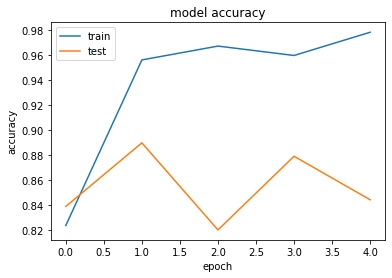

In [52]:
# summarize history for accuracy
plt.plot(vgg16_history.history['accuracy'])
plt.plot(vgg16_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

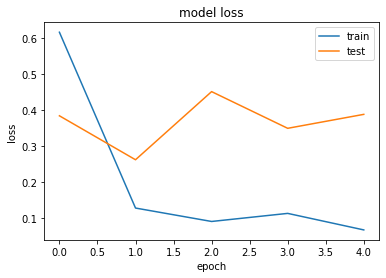

In [53]:
# summarize history for loss
plt.plot(vgg16_history.history['loss'])
plt.plot(vgg16_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [54]:
score = vgg16_model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

79/79 [==============================] - 194s 2s/step - loss: 0.0844 - accuracy: 0.9734
Loss: 0.0844
Accuracy: 0.9734


In [55]:
score = vgg16_model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

12/12 [==============================] - 26s 2s/step - loss: 0.2216 - accuracy: 0.9113
Loss: 0.2216
Accuracy: 0.9113


### Predicting the Signs on Test data

In [56]:
#loading the saved model for predictions on the test data
vgg16_model1=tf.keras.models.load_model('vgg16_model_cv.hdf5')


In [57]:
predict=vgg16_model1.predict_generator(test_generator)


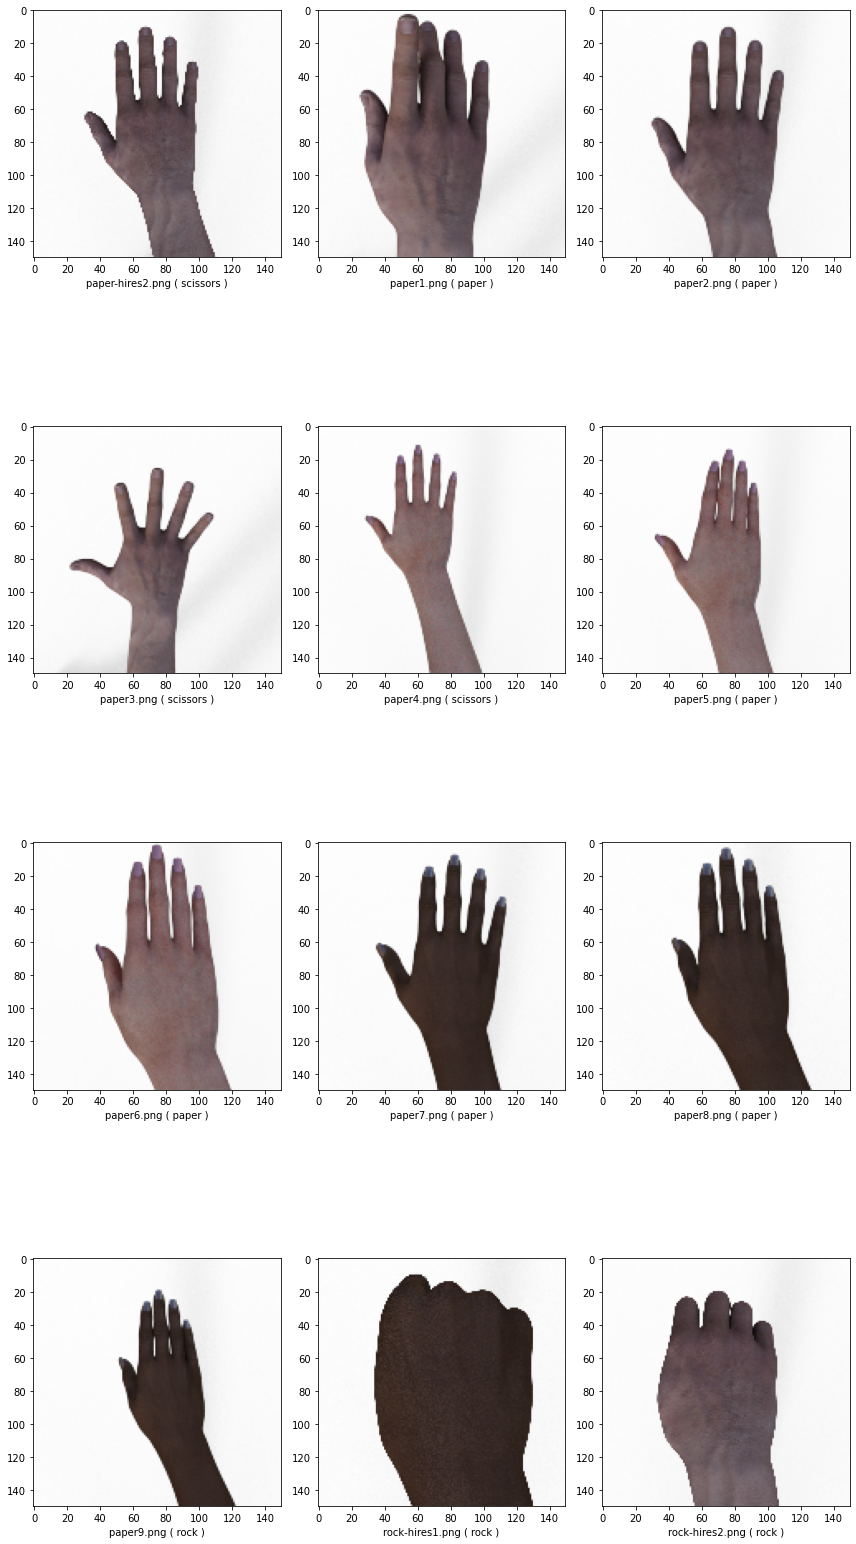

In [58]:
test_images=os.listdir(os.path.join(test_directory))
test_df=pd.DataFrame({'Image':test_images})



label_map = dict((v,k) for k,v in train_generator.class_indices.items())

test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(label_map)

import random
from keras.preprocessing.image import load_img

v = random.randint(0, 6)

sample_test = test_df.iloc[v:(v+12)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(test_directory +'/'+ filename, target_size = (150, 150))
    plt.subplot(4, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

In [59]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)
        
vgg16_test_acc=((sum(lis)/len(lis))*100)
print("Accuracy of the model on test data is {:.2f}".format(vgg16_test_acc))


Accuracy of the model on test data is 84.85


## 2. Inception Network

An inception network is a deep neural network with an architectural design that consists of repeating components referred to as Inception modules. It enables more efficient computation and deeper Networks through a dimensionality reduction with stacked 1×1 convolutions.

While the above VGG-16 secured the 2nd rank in that years’ ILSVRC, the 1st rank was secured by none other than Google – via its model GoogLeNet or Inception Network

In [60]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


tf.keras.backend.clear_session()  # For easy reset of notebook state.
inception_base_model = None

inception_base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in inception_base_model.layers:
    layer.trainable = False

In [61]:
inception_base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [62]:
from keras import layers

# Flatten the output layer to 1 dimension
x = layers.Flatten()(inception_base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final softmax layer with 3 node for classification output
x = layers.Dense(3, activation='softmax')(x)


#https://www.tensorflow.org/api_docs/python/tf/keras/Model
inception_model = tf.keras.models.Model(inception_base_model.input, x)


In [63]:
inception_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

Total params: 31,242,019
Trainable params: 9,439,235
Non-trainable params: 21,802,784
__________________________________________________________________________________________________


### Callbacks

In [64]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

early_stopping=EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='auto',min_delta=0,restore_best_weights=True)

filepath="inception_model_cv.hdf5"
model_checkpoint=ModelCheckpoint(filepath,save_best_only=True,verbose=1)

lr_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.001)

callbacks_list=[early_stopping,model_checkpoint,lr_rate_reduction]

### Compile

In [65]:
inception_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
#Defining the training parameters
epoch=10

### Training the Model

In [67]:
inception_history=inception_model.fit_generator(train_generator,validation_data=validation_generator,epochs=epoch,verbose=1,callbacks=callbacks_list)

Epoch 1/10
79/79 [==============================] - ETA: 0s - loss: 2.2560 - accuracy: 0.8123
Epoch 00001: val_loss improved from inf to 0.53888, saving model to inception_model_cv.hdf5
79/79 [==============================] - 72s 911ms/step - loss: 2.2560 - accuracy: 0.8123 - val_loss: 0.5389 - val_accuracy: 0.8710
Epoch 2/10
79/79 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.9151
Epoch 00002: val_loss did not improve from 0.53888
79/79 [==============================] - 69s 874ms/step - loss: 0.2416 - accuracy: 0.9151 - val_loss: 0.6125 - val_accuracy: 0.8522
Epoch 3/10
79/79 [==============================] - ETA: 0s - loss: 0.1844 - accuracy: 0.9397
Epoch 00003: val_loss did not improve from 0.53888
79/79 [==============================] - 71s 894ms/step - loss: 0.1844 - accuracy: 0.9397 - val_loss: 0.6849 - val_accuracy: 0.8253
Epoch 4/10
79/79 [==============================] - ETA: 0s - loss: 0.1705 - accuracy: 0.9421
Epoch 00004: val_loss improved fro

### Model Evaluation

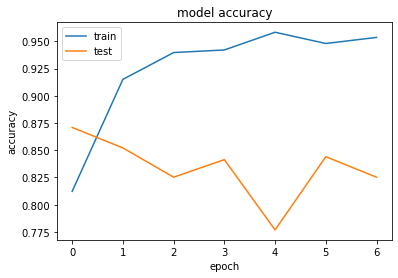

In [68]:
# summarize history for accuracy
plt.plot(inception_history.history['accuracy'])
plt.plot(inception_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

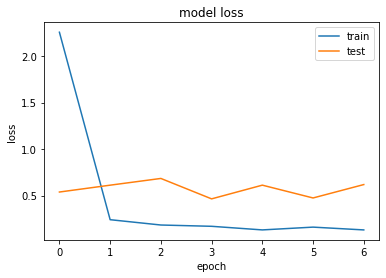

In [69]:
# summarize history for loss
plt.plot(inception_history.history['loss'])
plt.plot(inception_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [70]:
score = inception_model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

79/79 [==============================] - 56s 707ms/step - loss: 0.0809 - accuracy: 0.9706
Loss: 0.0809
Accuracy: 0.9706


In [71]:
score = inception_model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

12/12 [==============================] - 6s 539ms/step - loss: 0.5782 - accuracy: 0.8226
Loss: 0.5782
Accuracy: 0.8226


### Predicting the Signs on Test data

In [72]:
#Loading the saved model with best weights for prediction on test data

inception_model=tf.keras.models.load_model('inception_model_cv.hdf5')


In [73]:
predict=inception_model.predict_generator(test_generator)


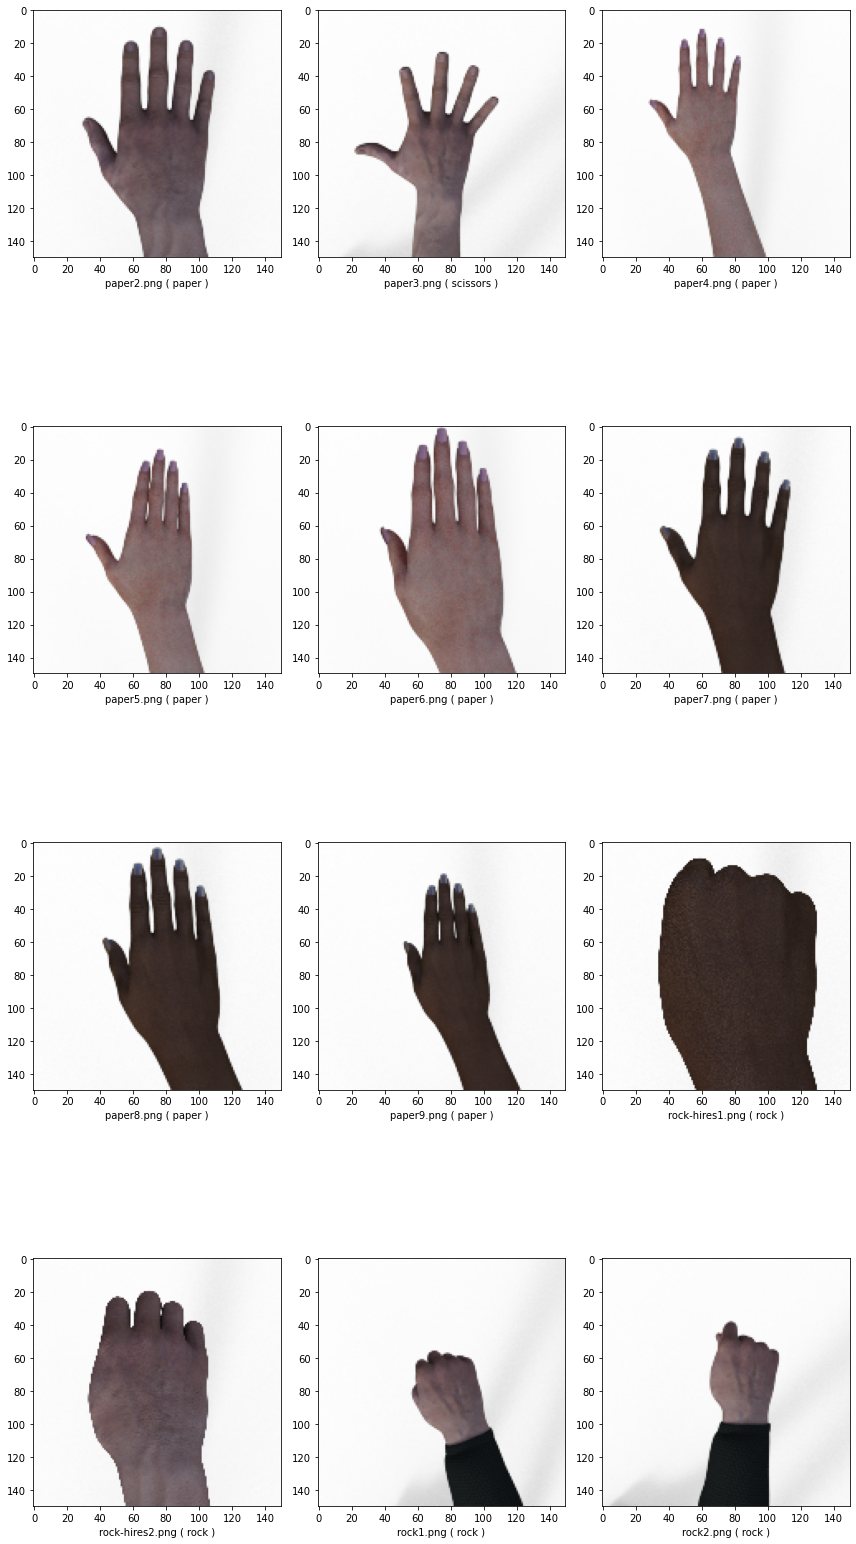

In [74]:
test_images=os.listdir(os.path.join(test_directory))
test_df=pd.DataFrame({'Image':test_images})


label_map = dict((v,k) for k,v in train_generator.class_indices.items())

test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(label_map)

import random
from keras.preprocessing.image import load_img

v = random.randint(0, 6)

sample_test = test_df.iloc[v:(v+12)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(test_directory +'/'+ filename, target_size = (150, 150))
    plt.subplot(4, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

In [75]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)
        
inception_test_acc=((sum(lis)/len(lis))*100)
print("Accuracy of the model on test data is {:.2f}".format(inception_test_acc))


Accuracy of the model on test data is 90.91


# Summarizing the Test accuracy obtained

In [76]:
items=[['CNN',cnn_test_acc],['VGG16',vgg16_test_acc],['Inception',inception_test_acc]]
summ_df=pd.DataFrame(items,columns=['Model','Test Accuracy'])
summ_df

,Model,Test Accuracy
0,CNN,90.909091
1,VGG16,84.848485
2,Inception,90.909091
